Phugoid Oscillation

In [1]:
#Import Libraries

import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
# Initialize T and dt

T = 100.0
dt = 0.02
N = int(T/dt)+1
t = numpy.linspace(0.0, T, N)

Challenge - Write t with "arange" instead of "linspace"

In [3]:
print(t[1]-t[0])

0.02


In [4]:
t2 = numpy.arange(0.0, T+(T/N), dt, dtype=None)

In [5]:
t == t2

array([ True,  True,  True, ...,  True,  True,  True], dtype=bool)

Euler's Method

In [6]:
# initial conditions
z0 = 100  #altitude
b0  = 10  #upward velocity resulting from gust
zt = 100
g  = 9.81

u = numpy.array([z0, b0])

# initialize an array to hold the changing elevation values
z = numpy.zeros(N)
z[0] = z0  

In [7]:
# time-loop using Euler's method
for n in range(1,N):
    u = u + dt*numpy.array([u[1], g*(1-u[0]/zt)])
    z[n] = u[0]

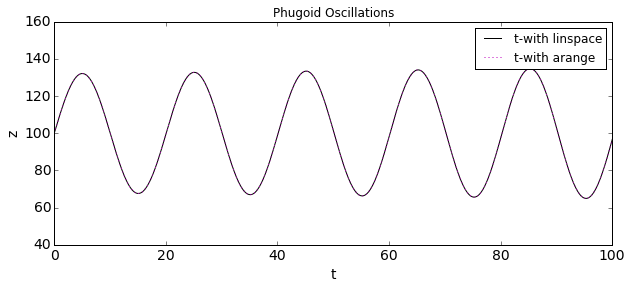

In [8]:
# Plot Oscillations
pyplot.figure(figsize=(10,4))   #set plot size
pyplot.ylim(40,160)             #y-axis plot limits
pyplot.tick_params(axis='both', labelsize=14) #increase font size for ticks
pyplot.xlabel('t', fontsize=14) #x label
pyplot.ylabel('z', fontsize=14) #y label
pyplot.plot(t,z, color='k', linestyle = '-')
pyplot.plot(t2,z, color='m', linestyle=':')
pyplot.legend(['t-with linspace','t-with arange'])
pyplot.title('Phugoid Oscillations');

Explore and Think

What happens when you have a larger gust?
What about a smaller gust?
What happens if there isn't a gust (v = 0)?

Answer: See graphs below for reference! (1) With a larger gust and an increas in upward velocity, the maximum z values (distance from the orginal horizontal trajectory) are greater. This means that the aircraft experiences greater elevation changes. (2) With a smaller gust, the elevation changes are smaller. (3) When there is no gust, the weight of the craft and the lift force are equal and opposite, and the vehicle finds itself on the 'trim' trajectory.

In [9]:
# initial conditions - Change b0 to reflect various scenarios

b0_increased_gust  = 20 
b0_decreased_gust = 5
b0_no_gust = 0

u_increased_gust = numpy.array([z0, b0_increased_gust])
u_decreased_gust = numpy.array([z0, b0_decreased_gust])
u_no_gust = numpy.array([z0, b0_no_gust])

# initialize an array to hold the changing elevation values
z_more_gust = numpy.zeros(N)
z_more_gust[0] = z0  

z_less_gust = numpy.zeros(N)
z_less_gust[0] = z0

z_no_gust = numpy.zeros(N)
z_no_gust[0] = z0

In [10]:
# time-loop using Euler's method
for n in range(1,N):
    u_increased_gust = u_increased_gust + dt*numpy.array([u_increased_gust[1], g*(1-u_increased_gust[0]/zt)])
    u_decreased_gust = u_decreased_gust + dt*numpy.array([u_decreased_gust[1], g*(1-u_decreased_gust[0]/zt)])
    u_no_gust = u_no_gust + dt*numpy.array([u_no_gust[1], g*(1-u_no_gust[0]/zt)])
    #
    z_more_gust[n] = u_increased_gust[0]
    z_less_gust[n] = u_decreased_gust[0]
    z_no_gust[n] = u_no_gust[0]
    

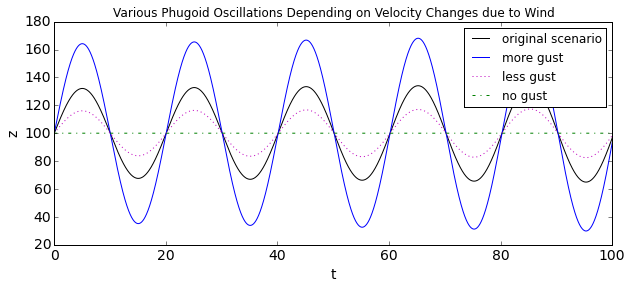

In [11]:
pyplot.figure(figsize=(10,4))   #set plot size
pyplot.ylim(20,180)             #y-axis plot limits
pyplot.tick_params(axis='both', labelsize=14) #increase font size for ticks
pyplot.xlabel('t', fontsize=14) #x label
pyplot.ylabel('z', fontsize=14) #y label
pyplot.plot(t,z, color='k', linestyle = '-')
pyplot.plot(t,z_more_gust, color='b', linestyle = '-')
pyplot.plot(t,z_less_gust, color='m', linestyle = ':')
pyplot.plot(t,z_no_gust, color='g', linestyle = '-.')
pyplot.legend(['original scenario','more gust','less gust','no gust'])
pyplot.title('Various Phugoid Oscillations Depending on Velocity Changes due to Wind');


Exact Solution

In [12]:
z_exact = b0*(zt/g)**.5*numpy.sin((g/zt)**.5*t)+\
            (z0-zt)*numpy.cos((g/zt)**.5*t)+zt

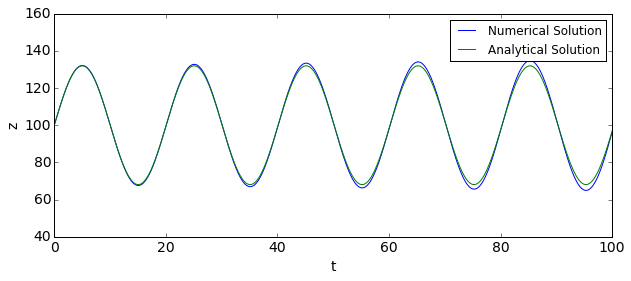

In [13]:
pyplot.figure(figsize=(10,4))
pyplot.ylim(40,160)             #y-axis plot limits
pyplot.tick_params(axis='both', labelsize=14) #increase font size for ticks
pyplot.xlabel('t', fontsize=14) #x label
pyplot.ylabel('z', fontsize=14) #y label
pyplot.plot(t,z)
pyplot.plot(t, z_exact)
pyplot.legend(['Numerical Solution','Analytical Solution']);

Now try a smaller dt to show difference between exact and numerical solutions

In [14]:
#re-run with dt = 0.01
dt = 0.01

In [15]:
u2 = numpy.array([z0, b0])

# initialize an array to hold the changing elevation values
z = numpy.zeros(N)
z[0] = z0  

# time-loop using Euler's method
for n in range(1,N):
    u2 = u2 + dt*numpy.array([u2[1], g*(1-u2[0]/zt)])
    z[n] = u2[0]

In [16]:
z_exact2 = b0*(zt/g)**.5*numpy.sin((g/zt)**.5*t)+\
            (z0-zt)*numpy.cos((g/zt)**.5*t)+zt

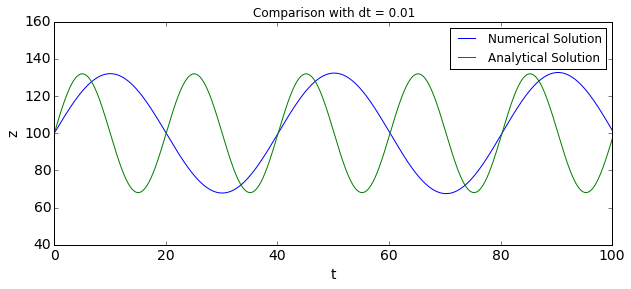

In [17]:
pyplot.figure(figsize=(10,4))
pyplot.ylim(40,160)             #y-axis plot limits
pyplot.tick_params(axis='both', labelsize=14) #increase font size for ticks
pyplot.xlabel('t', fontsize=14) #x label
pyplot.ylabel('z', fontsize=14) #y label
pyplot.plot(t,z)
pyplot.plot(t, z_exact2)
pyplot.legend(['Numerical Solution','Analytical Solution'])
pyplot.title('Comparison with dt = 0.01');

We see from the graph above that the error between the analytical and the Euler's method solutions has increased

Convergence

In [18]:
# time-increment array
dt_values = numpy.array([0.1, 0.05, 0.01, 0.005, 0.001, 0.0001])

# array that will contain solution of each grid
z_values = numpy.empty_like(dt_values, dtype=numpy.ndarray)

for i, dt in enumerate(dt_values):
    N = int(T/dt)+1    # number of time-steps
    ### discretize the time using numpy.linspace() ###
    t = numpy.linspace(0.0, T, N)

    # initial conditions
    u = numpy.array([z0, b0])
    z = numpy.empty_like(t)
    z[0] = z0
    
    # time loop - Euler method
    for n in range(1,N):
        ### compute next solution using Euler method ###
        u = u + dt*numpy.array([u[1], g*(1-u[0]/zt)])
        z[n] = u[0]   # store the elevation at time-step n+1
    
    z_values[i] = z.copy()    # store the total elevation calculation grid i

In [19]:
def get_error(z, dt):
    """Returns the error relative to analytical solution using L-1 norm.
    
    Parameters
    ----------
    z : array of float
        numerical solution.
    dt : float
        time increment.
        
    Returns
    -------
    err : float
        L_{1} norm of the error with respect to the exact solution.
    """
    N = len(z)
    t = numpy.linspace(0.0, T, N)
    
    z_exact = b0*(zt/g)**.5*numpy.sin((g/zt)**.5*t)+\
                (z0-zt)*numpy.cos((g/zt)**.5*t)+zt
    
    return dt * numpy.sum(numpy.abs(z-z_exact))

In [20]:
error_values = numpy.empty_like(dt_values)

for i, dt in enumerate(dt_values):
    ### call the function get_error() ###
    error_values[i] = get_error(z_values[i], dt)

(0.0001, 0.10000000000000001, 0.10000000000000001, 1000.0)

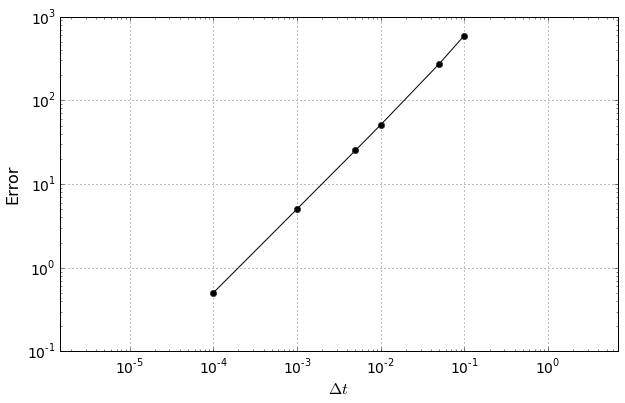

In [21]:
pyplot.figure(figsize=(10, 6))
pyplot.tick_params(axis='both', labelsize=14) #increase tick font size
pyplot.grid(True)                         #turn on grid lines
pyplot.xlabel('$\Delta t$', fontsize=16)  #x label
pyplot.ylabel('Error', fontsize=16)       #y label
pyplot.loglog(dt_values, error_values, 'ko-')  #log-log plot
pyplot.axis('equal')                      #make axes scale equally;

Challenge

We calculated the error for several different timestep sizes using two nested for loops. That worked, but whenever possible, we like to re-use code (and not just copy and paste it!).
Create a function that implements Euler's method and re-write the error analysis cell to use your function.

In [22]:
#create function for euler numerical method

def get_numerical_euler(z_initial,b_initial,time_step,z_trim,gravity):

    """" 
    z_initial --- z0
    b_initial --- b0
    time_step-----dt
    z_trim -------zt
    gravity------g
    
    """
    u = numpy.array([z_initial, b_initial])
    z = numpy.zeros(N)
    z[0] = z0
    
    # time-loop using Euler's method
    for n in range(1,N):
        u = u + time_step*numpy.array([u[1], gravity*(1-u[0]/z_trim)])
        z[n] = u[0]
        
    return z

In [23]:
#test

z_function = get_numerical_euler(z0,b0,dt,zt,g)

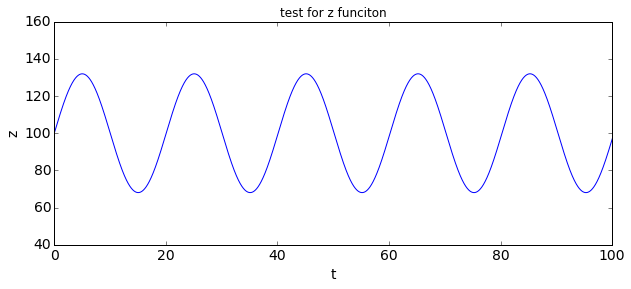

In [24]:
pyplot.figure(figsize=(10,4))
pyplot.ylim(40,160)             #y-axis plot limits
pyplot.tick_params(axis='both', labelsize=14) #increase font size for ticks
pyplot.xlabel('t', fontsize=14) #x label
pyplot.ylabel('z', fontsize=14) #y label
pyplot.plot(t,z_function)
pyplot.title('test for z funciton');

In [25]:
#create function for euler numerical method

def get_numerical_euler_mult(terminal_time,time_step,z_initial,b_initial,gravity,z_trim):

    """" 
    terminal_time--T
    time_step-----dt, dt_values
    z_initial --- z0
    b_initial --- b0
    z_trim -------zt
    gravity------g
    
    """
    
    N = int(T/dt)+1    # number of time-steps
    
    ### discretize the time using numpy.linspace() ###
    t = numpy.linspace(0.0, T, N)
    
    u = numpy.array([z_initial, b_initial])
    z = numpy.zeros(N)
    z[0] = z0
    
    # time-loop using Euler's method
    for n in range(1,N):
        u = u + time_step*numpy.array([u[1], gravity*(1-u[0]/z_trim)])
        z[n] = u[0]
        
    return z

In [26]:
# time-increment array
dt_values = numpy.array([0.1, 0.05, 0.01, 0.005, 0.001, 0.0001])

# array that will contain solution of each grid
z_values = numpy.empty_like(dt_values, dtype=numpy.ndarray)

for i, dt in enumerate(dt_values):
    z_func = get_numerical_euler_mult(T,dt,z0,b0,g,z0)
    
    z_values[i] = z_func.copy()


In [27]:
error_values2 = numpy.empty_like(dt_values)

for i, dt in enumerate(dt_values):
    ### call the function get_error() ###
    error_values2[i] = get_error(z_values[i], dt)

(0.0001, 0.10000000000000001, 0.10000000000000001, 1000.0)

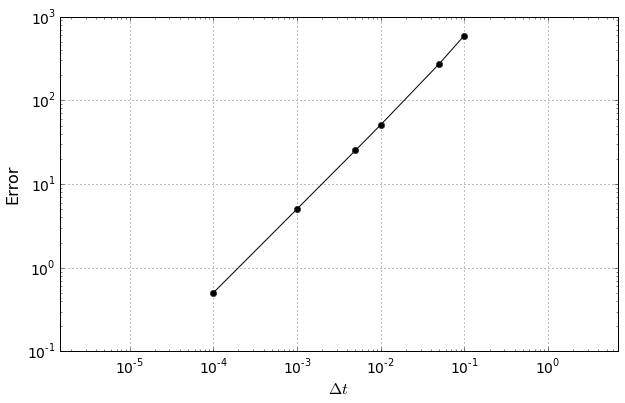

In [28]:
pyplot.figure(figsize=(10, 6))
pyplot.tick_params(axis='both', labelsize=14) #increase tick font size
pyplot.grid(True)                         #turn on grid lines
pyplot.xlabel('$\Delta t$', fontsize=16)  #x label
pyplot.ylabel('Error', fontsize=16)       #y label
pyplot.loglog(dt_values, error_values2, 'ko-')  #log-log plot
pyplot.axis('equal')                      #make axes scale equally;